# Project Analysis
### Sam Andrews, Dom Bouchard, John Logsdon

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis Question 3
- In what ways do the most successful teams compare and contrast in their style of play?

In [2]:
df = pd.read_csv('integrated_dataset.csv')
df['Team_Category'] = ['Top Team' if seed <= 5.0 else 'Bottom Team' for seed in df['SEED']]
df.head()

,School,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,Type,City,State,Team_Category
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,36.2,71.7,8.6,2ND,1.0,2016,Public,Chapel Hill,North Carolina,Top Team
1,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,33.9,72.8,8.4,Champions,1.0,2017,Public,Chapel Hill,North Carolina,Top Team
2,North Carolina,ACC,37,26,120.7,97.1,0.9242,52.0,50.1,16.7,...,38.0,72.6,7.1,R32,2.0,2018,Public,Chapel Hill,North Carolina,Top Team
3,North Carolina,ACC,34,24,113.4,94.7,0.8883,49.9,47.0,16.9,...,31.7,70.8,4.2,R32,6.0,2014,Public,Chapel Hill,North Carolina,Bottom Team
4,North Carolina,ACC,35,24,111.6,93.0,0.8902,49.3,48.0,17.2,...,34.4,71.4,2.5,R32,8.0,2013,Public,Chapel Hill,North Carolina,Bottom Team


In [3]:
top_df = df[df['SEED'] <= 5.0]
top_df.reset_index(inplace = True)
top_df

,index,School,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,Type,City,State,Team_Category
0,0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,...,36.2,71.7,8.6,2ND,1.0,2016,Public,Chapel Hill,North Carolina,Top Team
1,1,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,...,33.9,72.8,8.4,Champions,1.0,2017,Public,Chapel Hill,North Carolina,Top Team
2,2,North Carolina,ACC,37,26,120.7,97.1,0.9242,52.0,50.1,...,38.0,72.6,7.1,R32,2.0,2018,Public,Chapel Hill,North Carolina,Top Team
3,5,North Carolina,ACC,38,26,119.6,92.5,0.9507,51.6,45.4,...,30.0,69.9,6.5,S16,4.0,2015,Public,Chapel Hill,North Carolina,Top Team
4,6,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,...,33.5,76.0,10.0,S16,1.0,2019,Public,Chapel Hill,North Carolina,Top Team
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,3746,Saint Mary's,WCC,33,26,109.8,90.5,0.9024,52.7,48.3,...,34.3,63.7,3.9,R32,5.0,2022,Private,Moraga,California,Top Team
216,3747,Saint Mary's,WCC,34,27,112.1,90.5,0.9213,52.0,47.1,...,33.3,61.9,3.4,R32,5.0,2023,Private,Moraga,California,Top Team
217,3748,Saint Mary's,WCC,32,26,115.8,93.7,0.9198,53.1,45.1,...,32.4,62.1,1.4,R64,5.0,2024,Private,Moraga,California,Top Team
218,3795,Cincinnati,Amer,36,31,111.6,87.7,0.9417,51.2,43.3,...,30.9,66.2,5.9,R32,2.0,2018,Public,Cincinnati,Ohio,Top Team


In [4]:
bottom_df = df[(df['SEED'] > 5.0) | (df['SEED'].isna())]
bottom_df.reset_index(inplace = True)
bottom_df

,index,School,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,...,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,Type,City,State,Team_Category
0,3,North Carolina,ACC,34,24,113.4,94.7,0.8883,49.9,47.0,...,31.7,70.8,4.2,R32,6.0,2014,Public,Chapel Hill,North Carolina,Bottom Team
1,4,North Carolina,ACC,35,24,111.6,93.0,0.8902,49.3,48.0,...,34.4,71.4,2.5,R32,8.0,2013,Public,Chapel Hill,North Carolina,Bottom Team
2,7,North Carolina,ACC,28,18,108.8,91.6,0.8777,48.5,48.7,...,34.4,71.8,2.3,R64,8.0,2021,Public,Chapel Hill,North Carolina,Bottom Team
3,8,North Carolina,ACC,39,29,114.4,93.5,0.9113,51.5,48.6,...,33.7,70.1,4.3,2ND,8.0,2022,Public,Chapel Hill,North Carolina,Bottom Team
4,9,North Carolina,ACC,33,20,111.5,96.4,0.8431,49.2,48.7,...,33.0,68.8,-0.7,NaN,NaN,2023,Public,Chapel Hill,North Carolina,Bottom Team
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,3832,Texas A&M Commerce,Slnd,30,13,94.3,111.4,0.1281,46.0,52.4,...,35.0,66.1,-13.9,NaN,NaN,2024,Public,Commerce,Texas,Bottom Team
3613,3833,Stonehill,NEC,30,14,94.4,107.6,0.1809,50.9,50.2,...,34.6,66.6,-12.6,NaN,NaN,2023,Private,Easton,Massachusetts,Bottom Team
3614,3834,Stonehill,NEC,30,4,90.3,114.2,0.0629,46.7,52.7,...,35.9,68.1,-22.0,NaN,NaN,2024,Private,Easton,Massachusetts,Bottom Team
3615,3835,Queens,ASun,30,18,105.7,108.3,0.4299,51.2,53.0,...,35.3,69.8,-9.4,NaN,NaN,2023,Private,Charlotte,North Carolina,Bottom Team


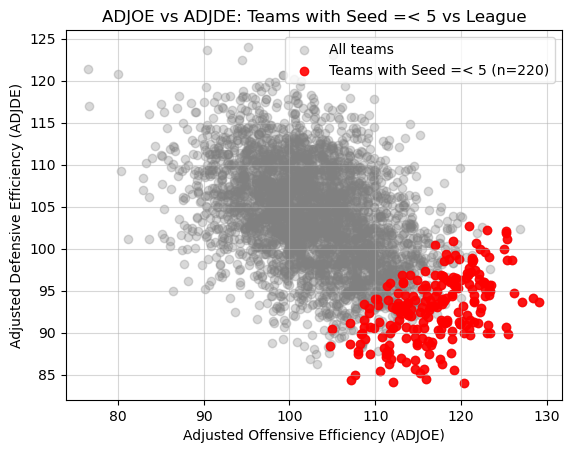

In [5]:
plt.figure()

# plot all teams in light gray
plt.scatter(df['ADJOE'], df['ADJDE'],alpha=0.3, label='All teams', color='gray')

# overlay top_df (seed < 5) teams in crimson
plt.scatter(top_df['ADJOE'], top_df['ADJDE'],alpha=0.9, label=f'Teams with Seed =< 5 (n={len(top_df)})', color='red')

plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Adjusted Defensive Efficiency (ADJDE)')
plt.title('ADJOE vs ADJDE: Teams with Seed =< 5 vs League')
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('Q3 - Scatter Plot ADJOE vs ADJDE: Teams with Seed =< 5 vs League')
plt.show()

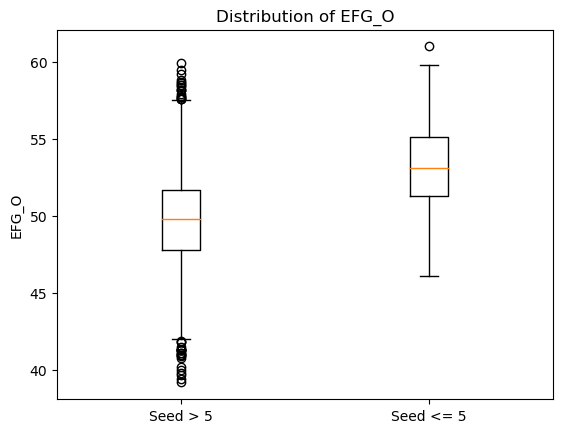

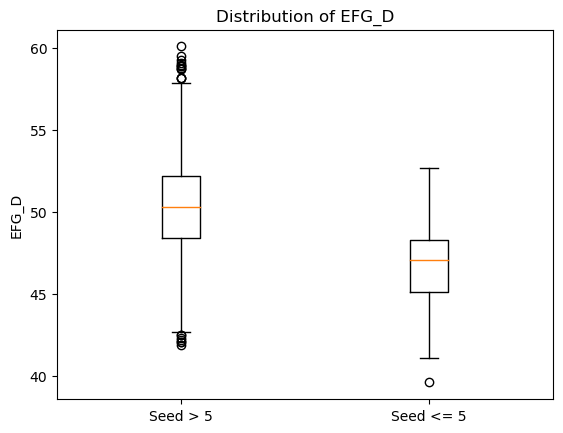

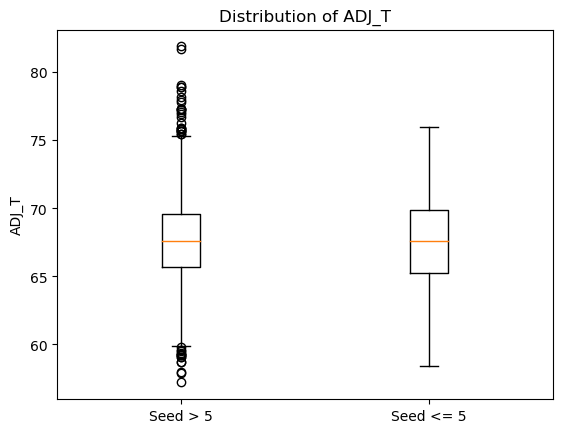

In [6]:

metrics = ['EFG_O','EFG_D', 'ADJ_T']
groups = [bottom_df, top_df]
labels = ['Seed > 5','Seed <= 5']

for m in metrics:
    plt.figure()
    data = [g[m].dropna() for g in groups]
    plt.boxplot(data, labels=labels)
    plt.title(f'Distribution of {m}')
    plt.ylabel(m)
    plt.savefig(f'Q3 - Box Plot Distribution of {m}')
    plt.show()

In [7]:
off_stats = ['TOR', 'ORB', 'FTR', '2P_O', '3P_O']

avg_off_stats = df.groupby('Team_Category')[off_stats].mean().reset_index()
avg_off_stats

,Team_Category,TOR,ORB,FTR,2P_O,3P_O
0,Bottom Team,18.639259,29.062897,34.339093,49.042134,34.022394
1,Top Team,16.770000,32.797727,35.022727,52.437727,36.244091


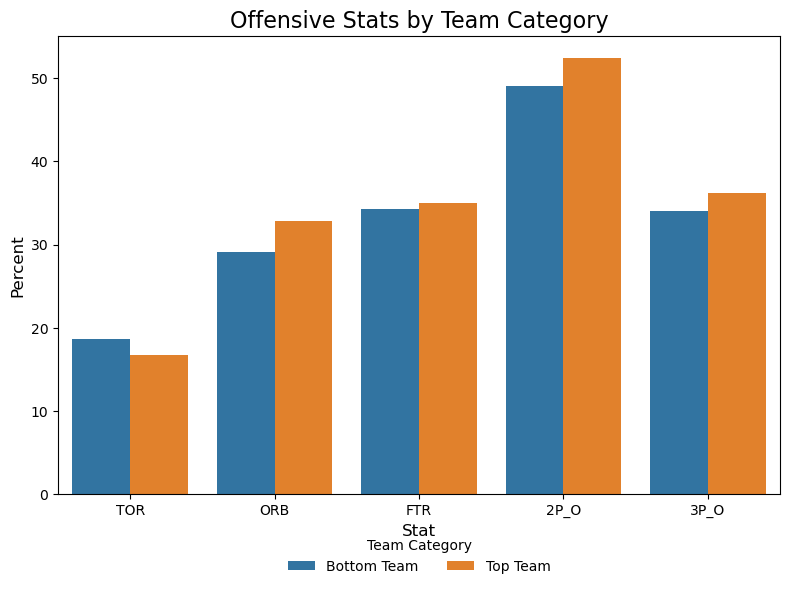

In [8]:
off_comp = pd.melt(avg_off_stats , id_vars="Team_Category", var_name="Stat", value_name="Value")

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=off_comp, x="Stat", y="Value", hue="Team_Category", errorbar=None)

ax.set_title("Offensive Stats by Team Category", fontsize=16)
ax.set_xlabel("Stat", fontsize=12)
ax.set_ylabel("Percent", fontsize=12)

ax.legend(title="Team Category", loc="lower center", bbox_to_anchor=(0.5, -0.2), 
          ncol=2, frameon=False, fontsize=10)


plt.tight_layout()
plt.savefig('Q3 - Grouped Bar Graph Offensive Stats by Team Category')
plt.show()

In [9]:
def_stats = ['TORD', 'DRB', 'FTRD', '2P_D', '3P_D']

avg_def_stats = df.groupby('Team_Category')[def_stats].mean().reset_index()
avg_def_stats

,Team_Category,TORD,DRB,FTRD,2P_D,3P_D
0,Bottom Team,18.442632,29.539425,34.838430,49.584213,34.426624
1,Top Team,18.975000,28.037727,30.979545,45.792273,32.474545


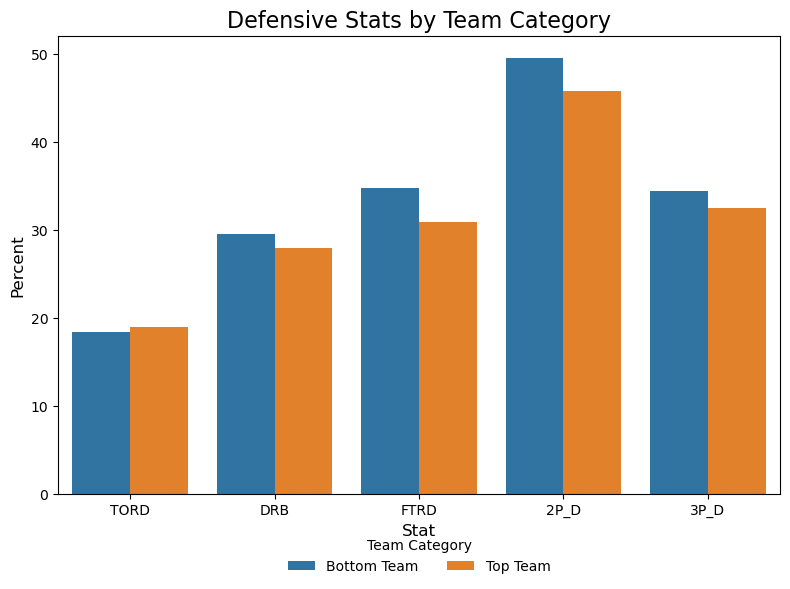

In [10]:
def_comp = pd.melt(avg_def_stats , id_vars="Team_Category", var_name="Stat", value_name="Value")

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=def_comp, x="Stat", y="Value", hue="Team_Category", errorbar=None)

ax.set_title("Defensive Stats by Team Category", fontsize=16)
ax.set_xlabel("Stat", fontsize=12)
ax.set_ylabel("Percent", fontsize=12)

ax.legend(title="Team Category", loc="lower center", bbox_to_anchor=(0.5, -0.2), 
          ncol=2, frameon=False, fontsize=10)


plt.tight_layout()
plt.savefig('Q3 - Grouped Bar Graph Defensive Stats by Team Category')
plt.show()

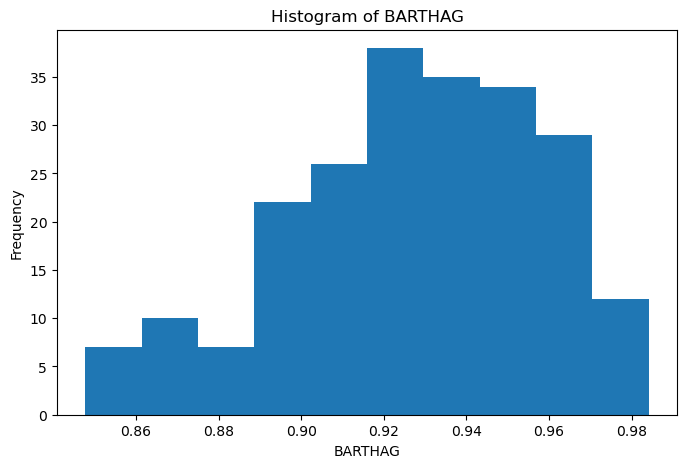

In [11]:
plt.figure(figsize=(8, 5))
top_df['BARTHAG'].hist()
plt.title("Histogram of BARTHAG")
plt.xlabel("BARTHAG")
plt.ylabel("Frequency")
plt.grid(False)
plt.savefig('Q3 - Histogram of BARTHAG')
plt.show()